### TMA4215 Numerisk Matematikk 

Høst 2021 – Tuesday, October 19, 2021

R. Bergmann, E. Çokaj, O. P. Hellan 

# Project 2: Bézier Curves and Interpolation

### Notes

**Groups.** This project is a group project and can be solved in groups of _up to three_ students. Feel free to use for example the Forum to find each other. Eventually it will be possible to register groups in Inspera. One person (per group) can create a group and will get a PIN code which can be used by the other group members for registering.

**Requirements for submission.** The submission is in [Inspera](https://ntnu.inspera.no/). Each group must submit their onw report. It is not allowed to copy from other groups.

All code – also the tests – should be in individual cells that can just be run (as soon as the necessary functions are defined). Functions should only be used in cells _after_ their definition, such that an evaltuation in order of the notebook does not yield errors.

It is not possible to have an extension for this project.

**Supervision.** For questions the usual time, Thursday, 18.15–20.00 can be used. Questions can also be asked in the Mattelab forum.

### Submission Deadline
Tuesday, November 9, 2021.

### Imports:

In [ ]:
import math
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special as ss
plt.style.use('default')
%matplotlib inline


## Introduction

In this project we consider another possibility to perform interpolation with piecewise polynomials, namely from the family of parametrized curves.

Let $\mathbf p_0,\ldots, \mathbf p_n\in \mathbb R^d$ (usually $d=2$ or $d=3$) denote $n+1$ ordered points.

Then the $n$th degree Bézier curve is defined by

$$
\mathbf c(t) = \mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) = \sum_{i=0}^{n} B_{i,n}(t)\mathbf{p}_i,
$$

where $B_{n,i}(t)$ are the $n$th degree _Bernstein polynomials_. We use the first notation, $\mathbf c(t)$ when the points are clear from context, and the second, $\mathbf b(t; \mathbf p_0,\ldots,\mathbf p_n)$ to emphasize the dependency of the nodes and/or the degree $n$.

$$
  B_{i,n}(t) = {n \choose i}t^i(1-t)^{n-i}, \qquad i=0,\ldots,n,
$$

where ${n \choose i} = \frac{n!}{i!(n-i)!}$ denotes the binomial coefficient.

To get familiar with the first few Bernstein polynomials it might be good to write down $B_{0,0}, B_{0,1}, B_{1,1}, B_{0,2}, B_{1,2},$ and $B_{2,2}.$ 

## Problem 1: Properties of Bernstein polynomials

Let $n\in \mathbb N$ be given. We consider the Bernstein polynomials $B_{i,n}(t)$, $i=0,\ldots,n$.

1. Show that $B_{i,n}(t) \geq 0$ for all $t\in [0,1]$.

To show that all Bernstein  polynomials are greater or equal to zero we first start with two easy cases $B_{0,1} = (1-t)$ and $ B_{1,1} = t$. It is clear that  these two polynomial are non-negative for $ t \in [0,1]$. Now assume that all the Bernstein polynomials of degree less than n are non-negative. We can then use the recursive formula

$$
B_{i,n}(t) = (1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t)
$$

to show that also $B_{i,n}$ is non-negative. Since the terms on the right hand side are all non-negative, then by induction we must have that $B_{i,n}(t) \geq 0$ for all $t\in [0,1]$. So all our Bernstein polynomials are non-negative on the interval from zero to one.


2. Show that the Bernstein polynomials for $0<i<n$ can be recursively defined by
  
   $$
   B_{i,n}(t) = (1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t), \qquad t \in [0,1].
   $$
  
   How does this look like for $B_{0,n}$ and $B_{n,n}$? 

To show that the Bernstein polynomials can be recirsively defined as  
$$
B_{i,n}(t) = (1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t), \qquad t \in [0,1].
$$

we write out the recursion as the Bernstein polynomials are defined.


$$
B_{i,n}(t) = (1-t){n-1 \choose i}t^{i}(1-t)^{n-1-i} + t{n-1 \choose i-1}t^{i-1}(1-t)^{n-1-(i-1)} 
$$

$$
= {n-1 \choose i}t^{i}(1-t)^{n-i} + {n-1 \choose i-1}t^{i-1}(1-t)^{n-i}
$$

$$
= \left[{n-1 \choose i} + {n-1 \choose i-1}t^{i-1} \right]t^{i}(1-t)^{n-1}$$

$$
= {n \choose i} t^{i}(1-t)^{n-i}
$$

$$= B_{i,n}(t)$$

We see that the recursion easily simplifies to the standard Bernstein polynomial

For the special cases of $B_{0,n}$ and $B_{n,n}$ we get


$$
   B_{0,n}(t) = (1-t)B_{0,n-1}(t) + tB_{-1,n-1}(t)
$$

and

$$
   B_{n,n}(t) = (1-t)B_{n,n-1}(t) + tB_{n-1,n-1}(t)
$$

Here we define $B_{-1,n-1}(t) = 0$ and $B_{n,n-1}(t) = 0$ so we get 

$$
 B_{0,n}(t) = (1-t)B_{0,n-1}(t)
$$

$$
 B_{n,n}(t) = tB_{n-1,n-1}(t)
$$

3. Show that the $B_{i,n}(t)$ form a partition of unity, i.e.
   $$
   \sum_{i=0}^n B_{i,n}(t) = 1 \qquad \text{ for } t \in [0,1].
   $$
   _Hint_: Use induction by $n$.

To show that $\sum_{i=0}^n B_{i,n}(t) = 1 \qquad \text{ for } t \in [0,1]$ forms a partition of unity we first need to show that 

$$
\sum_{i=0}^n B_{i,n}(t) = \sum_{i=0}^{n-1} B_{i,n-1}(t)
$$ 

We then use induction to show that this is equal to one. This is a straightforward computation and goes as follows.

$$
\sum_{i=0}^n B_{i,n}(t) = \sum_{i=0}^n \left[(1-t)B_{i,n-1}(t) + t(B_{i-1,n-1}(t))\right] 
$$


$$
= (1-t)\left[\sum_{i=0}^{n}B_{i,n-1}(t) + B_{n,n-1}(t)\right] + t\left[\sum_{i=1}^n B_{i-1,n-1}(t)
+ B_{-1,n-1}(t)\right]
$$


Now we utilize $B_{-1,n-1}(u) \equiv B_{n,n-1}(u) \equiv 0$ as defined in problem 1.4 and our equation simplifies to

$$
= (1-t)\sum_{i=0}^{n-1}B_{i,n-1}(t) + t\sum_{i=1}^n B_{i-1,n-1}(t)
$$


$$
= (1-t)\sum_{i=0}^{n}B_{i,n-1}(t) + t\sum_{i=0}^{n-1} B_{i-1,n-1}(t)
$$

$$
= \sum_{i=0}^{n-1} B_{i,n-1}(t)
$$

Now that this calculation is done we see that
$$
= \sum_{i=0}^{n} B_{i,n}(t) =  \sum_{i=0}^{n-1} B_{i,n-1}(t) = \sum_{i=0}^{n-2} B_{i,n-2}(t)
\dots = \sum_{i=0}^{1} B_{i,1}(t) = (1-t)+t = 1
$$

So $B_{i,n}(t)$ forms a partition of unity.


4. Show that the derivative is given by
   
   $$
   B_{i,n}'(t) =  n(B_{i-1,n-1}(t) - B_{i,n-1}(t))
   $$
   
   with $B_{-1,n-1}(u) \equiv B_{n,n-1}(u) \equiv 0$.

The derivative is given as

$$
\frac{d}{dt}B_{i,n} = \frac{d}{dt} {n\choose i} t^{i}(1-t)^{n-i}
$$
Writing it out we get

$$
= \frac{d}{dt} \frac{n!}{i!(n-i)!} t^{i}(1-t)^{n-i}
$$

Now we have to use the product rule ($u'v +uv'$) to take the derivative, and we get

$$
= \frac{in!}{i!(n-i)!} t^{i-1}(1-t)^{n-i} - \frac{(n-i)n!}{i!(n-i)!} t^{i}(1-t)^{n-i-1}
$$

$$
= \frac{n(n-1)!}{(i-1)!(n-i)!} t^{i-1}(1-t)^{n-i} - \frac{n(n-1)!}{i!(n-i-1)!} t^{i}(1-t)^{n-i}
$$

$$
= n(B_{i-1,n-1}(t) - B_{i,n-1}(t))
$$

5. Implement a function `Bernstein(i,n,t)` that evaluates $B_{i,n}$ at $t$ and plot all functions $B_{i,n}$, $i=0,\ldots,n$ for $n=3$ and $n=9$.

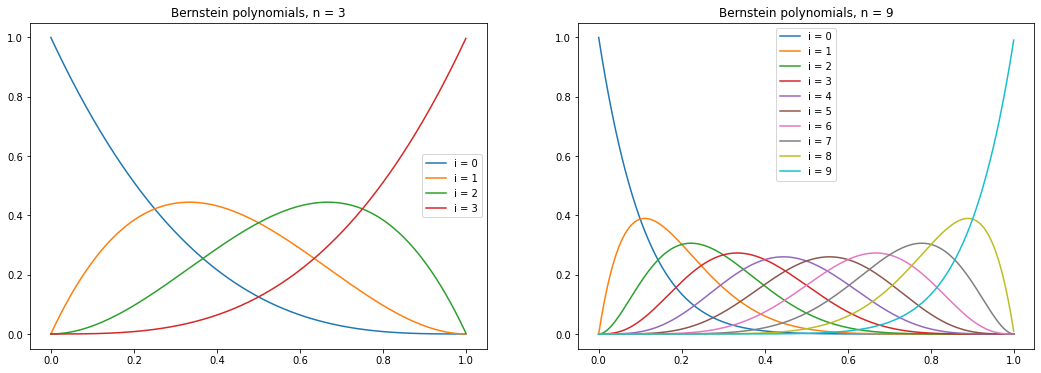

In [ ]:
def Bernstein(i, n, t):
  return ss.binom(n, i) * t**i * (1-t)**(n-i)

tvals = np.arange(0, 1, 0.001)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
for i in range(4):
  ax1.plot(tvals, [Bernstein(i, 3, t) for t in tvals], label=f"i = {i}")
for i in range(10):
  ax2.plot(tvals, [Bernstein(i, 9, t) for t in tvals], label=f"i = {i}")
ax1.set_title("Bernstein polynomials, n = 3")
ax2.set_title("Bernstein polynomials, n = 9")
ax1.legend()
ax2.legend()
plt.show()

## Problem 2: Properties of (composite) Bézier curves

We consider the points $\mathbf p_0,\ldots,\mathbf p_n \in \mathbb R^d$ and $\mathbf q_0,\ldots \mathbf q_n\in \mathbb R^d$ and their corresponding Bézier curves $\mathbf c(t) = \mathbf b(t; \mathbf p_0,\ldots,\mathbf p_n)$ and $\mathbf d(t) = \mathbf b(t; \mathbf q_0,\ldots, \mathbf q_n)$, respectively.

In this problem, we will also consider _composite Bézier curves_, or piecewise Bézier curves, e.g. a curve $\mathbf s \colon [0,2] \to \mathbb R^d$ defined by

$$
\mathbf s(t) = \begin{cases}
  \mathbf c(t) & \text{ for } 0 \leq t < 1\\
  \mathbf d(t-1) & \text{ for } 1 \leq t \leq 2.
\end{cases}
$$

1. Compute the first two derivatives $\mathbf c'(t)$ and $\mathbf c''(t)$ of $\mathbf c(t).$

$$c(t) = \sum_{i = 0}^{n} B_{n, i}(t) P_i$$


Using the result found earlier for $B_{i, n}'(t)$:

$$
 B_{i, n}'(t)= -nB_{i, n-1}(t) + nB_{i -1, n-1}
$$

We can now proceed with c'(t):

$$
c'(t) = \sum_{i=0}^n P_i B_{i, n}'(t) = \sum_{i=0}^n P_i (-nB_{i, n-1}(t) + nB_{i -1, n-1}) = \sum_{i=1}^n nP_i B_{i-1, n-1}(t) - \sum_{i=0}^{n-1}n P_i B_{i, n-1}(t)
$$

By changing the sum indexes we find that

$$
c'(t) = \sum_{i=0}^{n-1}n P_{i+1} B_{i, n-1}(t) - \sum_{i=0}^{n-1} n P_i B_{i, n-1}(t)
$$

$$
\implies c'(t) = \sum_{i=0}^{n-1}n(P_{i+1} - P_{i}) B_{i, n-1}(t)
$$


By repating this procedure, we can calculate the second derivative.

$$
c''(t) = \sum_{i=0}^{n-1}n(P_{i+1} - P_{i}) B_{i, n-1}'(t)
$$

From the previus result for $B_{i, n}'(t)$ i substitute for n-1:

$$
 B_{n-1, i}'(t)= -(n-1)B_{i, n-2}(t) + (n-1)B_{i-1, n-2}
$$

$$
\implies c''(t) = \sum_{i=0}^{n-2}n(P_{i+1} - P_{i}) [-(n-1)B_{i, n-2}(t) + (n-1)B_{i-1, n-2}]
$$

$$
= \sum_{i=0}^{n-2}n(n-1)(P_{i+1} - P_{i}) [B_{i, n-2}(t) + B_{i-1, n-2}]
$$

which eventually becomes
$$
\sum_{i = 0}^{n-2} B_{i, n-2}[n(n-1)(P_{i+2} - P_{i+1} - (P_{i+1} - P_{i})] = \sum_{i = 0}^{n-2} B_{i, n-2}[n(n-1)(P_{i+2} - 2P_{i+1} + P_{i})]
$$

$$
\implies c''(t) = \sum_{i = 0}^{n-2} B_{i, n-2}[n(n-1)(P_{i+2} - 2P_{i+1} + P_{i})]
$$

2. What values does $\mathbf c(t)$ attend at its end points? State $\mathbf c(0)$ and $\mathbf c(1).$

Its easy to see that the endpoints is the first and last point, $P_0$ and $P_n$

$$
B_{i, n} ={n \choose i} t^i (1-t)^{n-i}
$$

$$
B_{i, n}(0) = {n \choose i} 0^i (1)^{n-i} = \begin{cases}
1 & i = 0 \\
0 & ow.
\end{cases} \\
B_{i, n}(1) = {n \choose i} 1^i (0)^{n-i} = \begin{cases}
1 & i = n \\
0 &ow.
\end{cases}
$$
$$
\implies c(0) = P_0
$$
$$
\implies c(1) = P_n
$$

3. Prove that the following properties hold:
   1. $\mathbf c'(0) = n(\mathbf p_1-\mathbf p_0),$
   2. $\mathbf c''(0) = n(n-1)(\mathbf p_0-2\mathbf p_1 + \mathbf p_2),$
   3. $\mathbf c'(1) = n(\mathbf p_n-\mathbf p_{n-1}),$
   4. $\mathbf c''(1) = n(n-1)(\mathbf p_n-2\mathbf p_{n-1} + \mathbf p_{n-2}).$

This can be proven based on the already computed derivatives.
For $c'(t)$ we have the bernstein polynomial:


$$B_{i, n-1}(t) = {n-1 \choose i} t^i (1-t)^{n-i-1}$$

evaluating at t = 0 and t = 1:

$$B_{i, n-1}(0) = {n-1 \choose i} 0^i (1)^{n-i-1} = \begin{cases}
1 & i = 0 \\
0 & ow
\end{cases} \\
B_{i, n-1}(1) = {n-1 \choose i} 1^i (0)^{n-i-1} = \begin{cases}
1 & i = n-1 \\
0 & ow
\end{cases}
$$

$$
\implies c'(0) = n(P_{0+1} - P_0) = n(P_{1} - P_0) \\
\implies c'(1) = n(P_{n-1 + 1} - P_{n-1}) = n(P_{n} - P_{n-1})
$$

For the second derivative we have the bernstein polynomial:
$$
B_{i, n-2}(t) = {n-2 \choose i}t^i(1-t)^{n-i-2}\\
B_{i, n-2}(0) = {n-2 \choose i}0^i(1)^{n-i-2} \begin{cases}
1 & i = 0 \\
0 & ow.
\end{cases} \\
B_{i, n-2}(1) = {n-2 \choose i}1^i(0)^{n-i-2} \begin{cases}
1 & i = n-2 \\
0 & ow.
\end{cases} \\
$$
$$
\implies c''(0) = n(n-1)(P_2 - 2P_1 + P_0) \\
\implies c''(1) = n(n-1)(P_n-2P_{n-1} + P_{n-2})
$$



4. Use the recursion property of Bernstein polynomials to prove the recursive definition
   $$
   \mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) = (1-t)b_{n-1}(t; \mathbf p_0,\ldots,\mathbf p_{n-1}) + tb_{n-1}(t; \mathbf p_1,\ldots,\mathbf p_n).
   $$

Using the result we found in problem 1.2:
$$B_{i,n}(t) = (1-t){n-1 \choose i}t^{i}(1-t)^{n-1-i} + t{n-1 \choose i-1}t^{i-1}(1-t)^{n-1-(i-1)} $$

we can use this in $\mathbf b_n(t, p_1, ..., p_n)$ to prove the recursive definition.

$$\mathbf b_n(t; \mathbf p_0,\ldots,\mathbf p_n) = \sum_{i=0}^{n} B_{i,n}(t)\mathbf{p}_i = \sum_{i=0}^{n} ((1-t){n-1 \choose i}t^{i}(1-t)^{n-1-i} + t{n-1 \choose i-1}t^{i-1}(1-t)^{n-1-(i-1)}) \mathbf p_i$$
$$ 
= [(n-1) \sum_{i = 0}^{n} {n-1 \choose i}t^{i}(1-t)^{n-1-i} + t\sum_{i = 1}^{n}{n-1 \choose i-1}t^{i-1}(1-t)^{n-1-(i-1)}] \mathbf p_i \\
(1-t)b_{n-1}(t; p_0, ..., p_{n-1}) + tb_{n-1}(t;p_1, ..., p_{n-1}) 
$$

5. The recursion from point 4 of this problem can be used to define the so-called “de Casteljau” algorithm to evaluate $\mathbf b_n(t_0; ; \mathbf p_1,\ldots,\mathbf p_n)$ at $t_0 \in [0,1]$ algorithm:
   
   Starting with $\mathbf p_{0,i}(t_0) = \mathbf p_i$ compute for $k=0,\ldots,n$ and $i=0,\ldots,k$
   
   $$
   \mathbf p_{k,i}(t_0) = (1-t_0)\mathbf p_{k-1,i}(t_0) + t_0\mathbf p_{k-1,i+1}(t_0),
   $$
   then $\mathbf b_n(t_0; ; \mathbf p_1,\ldots,\mathbf p_n) = \mathbf p_{n,0}.$
   
   Implement a function `deCasteljau(P,t)` where `P` is a vector – of $n+1$ points – to evaluate the corresponding  Bézier curve at $t$.
   
   This function should also return (as a second return value) a vector `Pvecs` that contains a vector of points for every “level” $k$ considered.
   
   Plot the corresponding curve for the points 
   
   $$
   \mathbf p_{0} = \begin{pmatrix}0\\0\end{pmatrix},\quad
   \mathbf p_{1} = \begin{pmatrix}2\\3\end{pmatrix},\quad
   \mathbf p_{2} = \begin{pmatrix}4\\0\end{pmatrix},\quad
   \mathbf p_{3} = \begin{pmatrix}6\\-3\end{pmatrix},\quad
   \mathbf p_{4} = \begin{pmatrix}8\\0\end{pmatrix},
   $$
   
   including one line per “level” $k$ connecting the points when evaluating the curve at $t_0 = \frac{1}{3}$

In [ ]:
def deCasteljau(P, t):
    n = len(P)
    Q = np.zeros((n, 2))
    Pvecs = []

    for i in range(n):
        Q[i] = P[i]
    for k in range(1, n):
        for i in range(0, n-k):
            Q[i] = (1-t)*Q[i] + t*Q[i+1]
            tmp = Q[i]
            Pvecs.append([tmp[0], tmp[1]])      #Implementation of the deCasteljau algo
            
    return Q[0], Pvecs

In [ ]:
#points specified in problem
P = np.array(([0,0], [2,3], [4,0], [6,-3], [8, 0]))

t = np.arange(0, 1, 0.01)

#making bezier points corresponding to t
bezier = np.array([deCasteljau(P, i)[0] for i in t])

#making the lines @ t = 1/3
lines = np.array(deCasteljau(P, 1/3)[1])


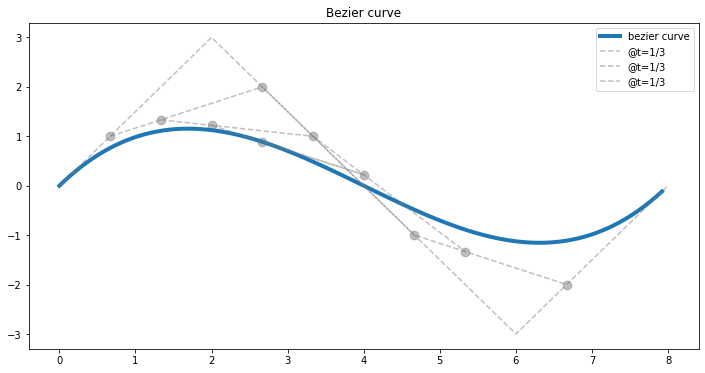

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(bezier[:, 0], bezier[:, 1], linewidth = 4, label ="bezier curve")
plt.plot(P[:, 0], P[:, 1], "--", color = "grey", alpha = 0.5)

plt.plot(lines[:4, 0], lines[:4, 1], "--", label = "@t=1/3", color="grey", alpha = 0.5)

plt.plot(lines[4:7, 0], lines[4:7, 1], "--", label = "@t=1/3", color = "grey", alpha = 0.5)
plt.plot(lines[7:, 0], lines[7:, 1], "--", label = "@t=1/3", color = "grey", alpha = 0.5)

plt.scatter(lines[:, 0], lines[:, 1], s=75, color = "grey", alpha = 0.5)
plt.legend()
plt.title("Bezier curve")
plt.show()

6. Consider a _composite Bézier curve_ $\mathbf s(t)$ as described in the beginning of this problem. Assume we want $\mathbf s(t)$ to be a $C^{(k)}$, $k=0,1,2$ function. Then surely, increasing the class $k$ increases the dependent properties we have to impose.
   1. What are the critical points of $\mathbf s(t)$ to investigate for the property to be a $C^{(k)}$ function?
   2. Which properties have to hold for continuity ($k=0$)? 
   3. Which properties have to hold for $\mathbf s(t)$ to be continuously differentiable ($k=1$) ?
   4. Which properties have to hold for $\mathbf s(t)$ to be twice continuously differentiable ($k=2$) ?
   
   Try to simplify the conditions for the third and fourth point based on the properties you derived before.
   
   5. What changes if we want $\mathbf s(t)$ to be periodic, i.e. $s(t) = s(2+t)$ for all $t$ for the continous differentiability case $k=1$? 

1. For $s(t)$ to be a $C^{k}$ function we need that to investige the control point and their derivatives. This is because between our control points the curve is usually smooth.


2. For continuity we need that $d(t-1)$ starts at the same point as $c(t)$. This is because a function can not be continuous if it is in several "cut pieces".

3. For $s(t)$ to be continuously differentiable we need continuity and the fact that $c'(1) = d'(0)$ this means that the derivative of the endpoint of $c$ must be equal to the derivative of the starting point of $d$.

4. For s(t) to be twice continously differentiable  we need the properties from 3 and the fact that $c''(1) = d''(0)$.

5. If we want s(t) to be periodic for all t when s is continuously differentiable we also need that $d(1) = c(0)$ and $d'(1) = c'(0)$. This is because we can not get periodicity when the derivatives of the endpoints are not the same.

## Problem 3: Interpolation with (composite, cubic) Bézier curves

The most prominent variant are – similar to $B$ splines – again those Bézier curves that yield cubic polynomials, i.e. $\mathbf b_3(t; \mathbf p_0,\mathbf p_1,\mathbf p_2,\mathbf p_3)$. To obtain a spline, we consider _composite Bézier curves_, i.e. we “stitch together” several Bézier curves (as considered for the case of 2 curves in the last problem):

Given a number $m$ of segments and $\mathbf p_{0,i}, \mathbf p_{1,i}, \mathbf p_{2,i}, \mathbf p_{3,i}$ for $i=1,\ldots,m$, then we define

$$
\mathbf B(t) = \begin{cases} \ & \\
b_3(t-i+1; \mathbf p_{0,i}, \mathbf p_{1,i}, \mathbf p_{2,i}, \mathbf p_{3,i})   
& \text{ for } i-1 \leq t < i \text{ and each } i=1,\ldots,m\\
& \\
\end{cases}
$$

1. Implement a function `compositeBézier(P, t)` that evaluates $\mathbf B(t), t\in [0,m]$, where $P = (\mathbf p_{j,i})_{j=0, i=1}^{3,m}$ denotes a matrix of control points. Note that you can obtain the degree and the number of segments from the size of `P`.
   
   Test your function with the 3-segment cubic composite B spline given by
   $$
   \begin{aligned}
   \mathbf p_{0,1} &= \begin{pmatrix} -1\\0\end{pmatrix},\quad
   \mathbf p_{1,1} &= \begin{pmatrix} -1\\\frac{1}{3}\end{pmatrix},\quad
   \mathbf p_{2,1} &= \begin{pmatrix} -\frac{1}{3}\\1\end{pmatrix},\quad
   \mathbf p_{3,1} &= \begin{pmatrix}  0\\1\end{pmatrix}\\
   \mathbf p_{0,2} &= \begin{pmatrix}  0\\1\end{pmatrix},\quad
   \mathbf p_{1,2} &= \begin{pmatrix}  \frac{1}{3}\\1\end{pmatrix},\quad
   \mathbf p_{2,2} &= \begin{pmatrix}  1\\\frac{1}{3}\end{pmatrix},\quad
   \mathbf p_{3,2} &= \begin{pmatrix}  0\\1\end{pmatrix}\\
   \mathbf p_{0,3} &= \begin{pmatrix}  0\\1\end{pmatrix},\quad
   \mathbf p_{1,3} &= \begin{pmatrix}  -\frac{1}{3}\\1\end{pmatrix},\quad
   \mathbf p_{2,3} &= \begin{pmatrix} \frac{1}{3}\\-1\end{pmatrix},\quad
   \mathbf p_{3,3} &= \begin{pmatrix}  0\\-1\end{pmatrix}\\
   \end{aligned}
   $$
   and plot the resulting (complete) curve $\mathbf B$.

In [ ]:
def compositeBézier(P, t):
  for i in range(len(P)):
    if (i <= t and t <= i + 1):
      return deCasteljau(P[i], t-i)[0]

In [ ]:
P = np.array([
              [[-1, 0], [-1, 1/3], [-1/3, 1], [0, 1]],
              [[0, 1], [1/3, 1], [1, 1/3], [0, 1]],
              [[0, 1], [-1/3, 1], [1/3, -1], [0, -1]]
])

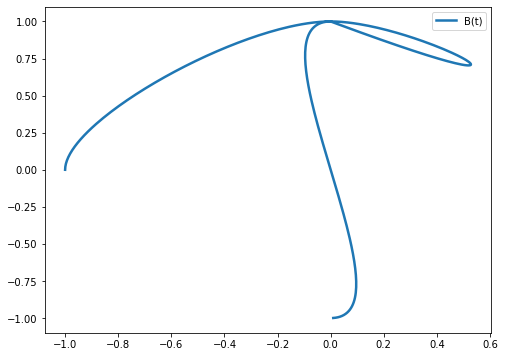

In [ ]:
t = np.arange(0, 3, 0.01)
compBez = np.array([compositeBézier(P, i) for i in t])

plt.figure(figsize=(8, 6))
plt.plot(compBez[:, 0], compBez[:, 1], linewidth = 2.5, label="B(t)")
#plt.scatter(P[:][:][0], P[:][:][1], color = "grey", label="control points")
plt.legend()
plt.show()

2. Use the properties derived so far to derive an algorithm for the following problem:
   
   Given data points $\mathbf a_0,\ldots,\mathbf a_{m-1} \in \mathbb R^d$ and velocities $\mathbf v_0, \mathbf v_1, \ldots, \mathbf v_{m-1}, \in \mathbb R^d$.
   
   Find the _periodic composite cubic Bézier curve_ $\mathbf B(t)$ that maps from $[0,m]$ to $\mathbb R^d$ with the following properties
   * $\mathbf B(0) = \mathbf B(m),$
   * $\mathbf B'(0) = \mathbf B'(m),$
   * $\mathbf B(i) = \mathbf a_i$ for $i=0,\ldots,m-1,$
   * $\mathbf B'(i) = \mathbf v_i$ for $i=0,\ldots,m-1.$

   You can for example first sketch the algorithm or a few ideas in $\LaTeX$.
   
   Then implement a function `interpolate_periodic(A,V)` where `A` is the vector of the interpolation points $[\mathbf a_0,\ldots,\mathbf a_{m-1}]$ and `V` is the vector of the velocities $[\mathbf v_0,\ldots,\mathbf v_{m-1}]$.   
   The function should return a matrix `P` like in the first part to be able to plot the result.

#### Sketch
To create this algorithm we need to look at the derivative of the bezier function. 
Using the fact that $B'(0) = n(P_1 - P_0)$ and $B'(1) = n(P_n - P_n-1)$. We can create the two extra points based on the velocity.
These points essentially determines the curvature of the bezier function, between $a_i$ and $a_{i+1}$. This way we will create rows similar to P, with the new points as the middle elements in the row. This way we get a cubic bezier.



In [ ]:
def interpolate_periodic(A,V):
  """
  Creates two points for each row, based on the velocities. As described in the sketch.
  """
  n = 3
  m = len(A)-1

  A = np.array(A)
  V = np.array(V)

  P = []

  for i in range(1, m):
    row = [A[i-1], 1/n * V[i-1] + A[i-1], -1/n * V[i] + A[i], A[i]]
    P.append(np.array(row).tolist())

  extrarow = [A[m], 1/n * V[m] + A[m], -1/n * V[0] + A[0], A[0]]
  P.append(np.array(extrarow).tolist())

  return P

3. Take your favourite letter from the alphabet. Draw its outline – 
i.e. a closed curve surrounding the letter– on a graph paper (those with a regular 2D grid) and take a few measurements of points and velocities. Use this data to illustrate how your function from 2 works. 

   _Hint_: a good idea is to take a letter without holes that only consist of one component like `t` or `T` (maybe not the little boring `l`).
    
   _Bonus Task_: Ignore the hint and do something fancy with `å`, `æ`, `ø`, or even `ß` (though that can be done with one outline in most this fonts).

In [ ]:
#points based of on graph paper. For letter E
Ep = np.matrix("-3 5; -1 5; 3 5; 3 3; -1 3; -1 1; 1 1; 1 -1; -1 -1; -1 -3; 3 -3; 3 -5; -1 -5; -3 -5; -3 -3; -3 0; -3 3")
Ep = Ep.tolist() 

I am not fond of having np.arrays and matricies when i can have it as a list form. As you will see in the following code i use np.arrays to do vector operations and i switch back to list after the operations are done. This way i have controll of what type of objects my list contain.

In [ ]:
def point_velocity(A, scaling = 1):
  """
  Creates a vector between Ai, Ai+1. Since this vector is the derivative of the
  bezier curve, we can scale the velocity down by the scaling input. Making
  it less curvy. 
  """
  V = [[A[i][0] - A[i-1][0], A[i][1] - A[i-1][1]] for i in range(1, len(Ep))]
  V.append([A[0][0] - A[len(A)-1][0], A[0][1] - A[len(A)-1][1]])
  V = 1/scaling * np.array(V)
  return V.tolist()

[]

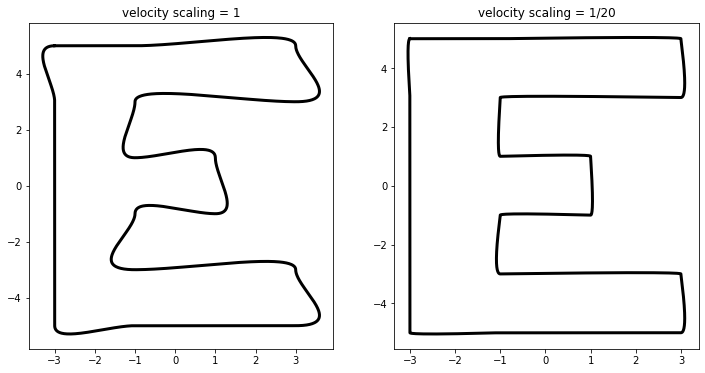

In [ ]:
E1 = interpolate_periodic(Ep, point_velocity(Ep)) #creating periodic interpolation points
E2 = interpolate_periodic(Ep, point_velocity(Ep, 7))
t = np.arange(0, len(E1), 0.01)
E1_bezier = np.array([compositeBézier(E1, i) for i in t]) #creating composite bezier curve
E2_bezier = np.array([compositeBézier(E2, i) for i in t]) #creating composite bezier curve

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(E1_bezier[:, 0], E1_bezier[:, 1], color="black", linewidth=3)
ax1.set_title("velocity scaling = 1")
ax2.plot(E2_bezier[:, 0], E2_bezier[:, 1], color="black", linewidth=3)
ax2.set_title("velocity scaling = 1/20")
plt.plot()

4. Take the resulting control points from part 3 of this problem and create the following new curves with new sets of points given by
   1. `Q` where each $\mathbf q_{i,j} = 2\mathbf p_{i,j}$
   2. `R` where each $\mathbf r_{i,j} = \begin{pmatrix} \cos\frac{\pi}{4} & -\sin\frac{\pi}{4}\\ \sin\frac{\pi}{4} & \cos\frac{\pi}{4}\end{pmatrix}\mathbf p_{i,j}$
   3. `S` where each $\mathbf s_{i,j} = \begin{pmatrix} 1 & \frac{1}{2}\\ 1 & 0\end{pmatrix}\mathbf p_{i,j} + \frac{1}{2}\begin{pmatrix}1\\1\end{pmatrix}$
   4. `T` where each $\mathbf t_{i,j} = \begin{pmatrix} -1 & -\frac{1}{2}\\ 1 & 0\end{pmatrix}\mathbf p_{i,j} + \frac{1}{2}\begin{pmatrix}1\\-1\end{pmatrix}$
   where each $i=0,1,2,3$ and $j=0,\ldots,m-1$

In [ ]:
E = E1.copy()
E = np.array(E)

#creating Q [1]
Q = (2*E).tolist()

#creating R [2]
T1 = np.matrix([[np.cos(np.pi/4), -np.sin(np.pi/4)], [np.sin(np.pi/4), np.cos(np.pi/4)]])
R = []
for row in E2:
  r = []
  for p in row:
    r.append(np.matmul(T1, p).tolist()[0])
  R.append(r)

#creating S [3]
T2 = np.matrix("1 0.5; 1 0")
S = []
for row in E2:
  r = []
  for p in row:
    r.append((np.matmul(T2, p)[0] + 1/2 * np.array([1, 1])).tolist()[0])
  S.append(r)

#creating T [4]
T3 = np.matrix("-1 -0.5; 1 0")
T = []
for row in E2:
  r = []
  for p in row:
    r.append((np.matmul(T3, p)[0] + 1/2 * np.array([1, -1])).tolist()[0])
  T.append(r)

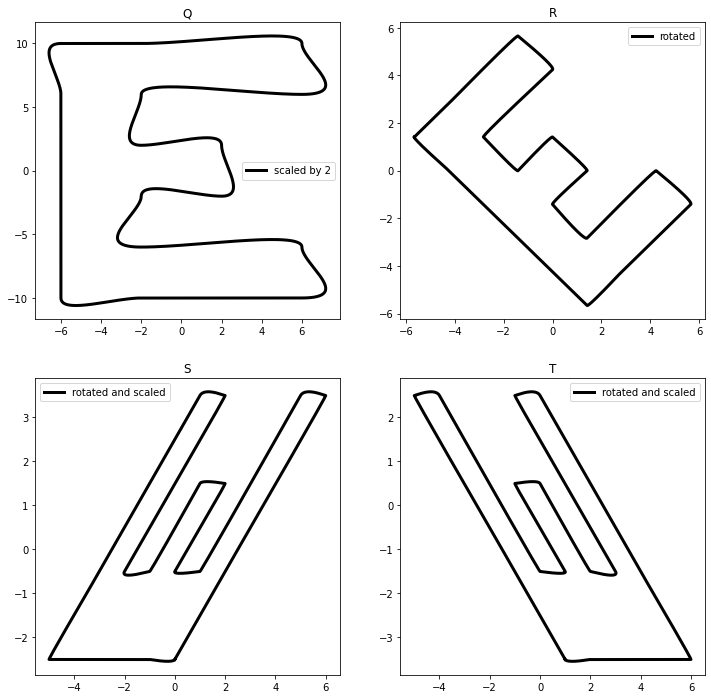

In [ ]:
#making curves
t = np.arange(0, len(E), 0.01)

Q_bezier = np.array([compositeBézier(Q, i) for i in t])
R_bezier = np.array([compositeBézier(R, i) for i in t])
S_bezier = np.array([compositeBézier(S, i) for i in t])
T_bezier = np.array([compositeBézier(T, i) for i in t])

#visualising result
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
ax[0][0].plot(Q_bezier[:, 0], Q_bezier[:, 1], label="scaled by 2", color = "black", linewidth=3)
ax[0][1].plot(R_bezier[:, 0], R_bezier[:, 1], label="rotated",color = "black", linewidth=3)
ax[1][0].plot(S_bezier[:, 0], S_bezier[:, 1], label="rotated and scaled",color = "black", linewidth=3)
ax[1][1].plot(T_bezier[:, 0], T_bezier[:, 1], label="rotated and scaled",color = "black", linewidth=3)
ax[0][0].set_title("Q")
ax[0][1].set_title("R")
ax[1][0].set_title("S")
ax[1][1].set_title("T")
for i in ax:
  for j in i:
    j.legend()
plt.show()

## Problem 4: Optimisation with Bézier curves

Similar to Problem 3, assume we have a composite cubic Bézier curve $\mathbf B(t)$ (here just not necessarily periodic) with $m$ segments, i.e. control points $\mathbf p_{0,1}, \mathbf p_{1,1}, \mathbf p_{2,1}, \mathbf p_{3,1}, \mathbf p_{0,2}, \mathbf p_{1,2},\ldots,\mathbf p_{3,m}$.
We denote its segments by $\mathbf c_i\colon [i-1,i] \to \mathbb R^2$, for  $i=1,\ldots,m$.
Then $\mathbf B(t)$ is defined on $[0,m]$.
Assume further that $\mathbf B(t)$ is $C^{(1)}$.

1. Due to the property of $\mathbf B(t)$ being continuous, we have
   $\mathbf p_{3,i} = \mathbf p_{0,i+1}$ for $i=1,\ldots,m-1$, so we can omit “storing” the redundant data of $\mathbf p_{3,i}.$
   
   Similarly due to the differentiability we can express $\mathbf p_{2,i}$ using $\mathbf p_{0,i+1}$ and $\mathbf p_{1,i+1}$ for each $i=1,\ldots,m-1$. What does this expression look like?
   
   _Bonus question_: The “data” we store for $\mathbf p_{2,i}$ and/or $\mathbf p_{1,{i+1}}$ is just one vector in $\mathbb R^d$. Can we phrase this information in terms of the velocity $\mathbf v_{i+1}$ at $\mathbf p_{0,i+1}$, i.e. such that from this velocity we can recover both “neighboring” points?


Because of differentiability we can write $\mathbf p_{2,i} = 2\mathbf p_{1,i+1} - \mathbf p_{0,i+1}$ from from problem 2. The rows in P become:
$[P_{0,i}, P_{1, i}, 2P_{0, i+1} - P_{1, i+1}]$ for $i = 1,..., m-1$
and the last row for $i=m$ we have: $[P_{0, m}, P_{1, m}, P_{2, m}, P_{3, m}]$.

2. We want to minimize the (squared) acceleration of the curve
   $$
   F(\mathbf P)
   =
   \int_{0}^{m} \lVert \mathbf B''(t) \rVert^2 \mathrm{d}t
   ,\qquad\text{for some}\quad\lambda > 0
   $$
   with respect to the remaining control points
   $$
   \mathbf P= [\mathbf p_{0,1}, \mathbf p_{1,1}, \mathbf p_{0,2}, \mathbf p_{1,2}, \ldots, \mathbf p_{0,m-1}, \mathbf p_{1,m-1} \mathbf p_{0,m}, \mathbf p_{1,m}, \mathbf p_{2,m}, \mathbf p_{3,m}, ].
   $$

   For simplicity we only consider one segment, i.e. for $\mathbf q_0,\mathbf q_1, \mathbf q_2, \mathbf q_3 \in \mathbb R^2$, we consider the cubic Bézier curve $\mathbf b_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)$.
   
   First derive a closed form for the integral
   
   $$
   \int_0^1 \lVert \mathbf b''_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) \rVert_2^2\ \mathrm{d} t
   $$
   
   in order to derive the gradient of 
   $$
   \tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) = \int_0^1 \lVert \mathbf b''_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)\rVert_2^2 \ \mathrm{d} t
   $$
   and with respect to the control points $\mathbf q_i, i=0,\ldots,3$.
   
   While we do not want to write down the whole gradient of $F$, please sketch how you can use the result of $\tilde F$ to compute the gradient of $F$. Remember that $\mathbf B(t)$ is continuously differentiable.

The cubic bezier can be written as
$$b_3(t, q_0, q_1, q_2, q_3) = (1 - t)^3 q_0 + 3(1-t)^2 t q_1 + 3(1 - t) t^2 q_2 + t^3 q_3 $$

Taking the derivative twice we get the expression

$$b''_3(t, q_0, q_1, q_2, q_3) = q_0(6-6t)+q_1(18t-12)+q_2(6-18t)+q_3 6t $$

Since $q_0, q_1, q_2, q_3 \in R$ the norm is


$$||b_3(t, q_0, q_1, q_2, q_3) ||^2_2 = | q_0(6-6t)+q_1(18t-12)+q_2(6-18t)+q_3 6t |^2$$

$$ = 36 (-q_0 t + q_0 + t(3q_1 - 3q_2 + q_3) - 2q_1 + q_2)^2$$

Next we evaluate the integral

$$I = \int_0^1 \lVert \mathbf b''_3(t; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) \rVert_2^2\ \mathrm{d} t = \int_0^1 36 (-q_0 t + q_0 + t(3q_1 - 3q_2 + q_3) - 2q_1 + q_2)^2 dt$$

Using wolfram alpha we found the solution: 
$$ I = 12(q_0^2 + q_0(q_3-3q_1) + 3q_1^2 - 3q_1q_2 + 3q_2^2 - 3q_2q_3 + q_3^2)$$


$$\implies \tilde F(q_0, q_1, q_2, q_3) = 12(q_0^2 + q_0(q_3-3q_1) + 3q_1^2 - 3q_1q_2 + 3q_2^2 - 3q_2q_3 + q_3^2)$$

Next we take the gradient of F and we get 
$$
 \nabla \tilde F(\mathbf q)= 12 \left[\begin{array}{c}\frac{\partial F}{\partial q_{0}}(\mathbf q) \\ \vdots \\ \frac{\partial F}{\partial q_{3}}(\mathbf q)\end{array}\right]
$$

$$
\\
= 12 \left[\begin{array}{c}2q_0 -3q_1 +q_3 \\-3q_0 + 6q_1 -3q_2 \\-3q_1 + 6q_2 -3q_3 \\q_0 - 3q_2 + 2q_3 \end{array}\right]
$$

To find the gradient of $F$ we need to use the fact that due to continuity and differentiability, points in the middle can be expressed as earlier points and therefore we dont need to know all the points to find the gradient for m line segments of $F$.

3. Look at the first order optimality conditions of the optimisation task to minimize $\tilde F$ from the last part.
   How can we find such a minimiser?
   Is the solution unique?
   
   For the overall problem $F$ we even have to take into account the properties from the fist part. What about the solution now? Is it unique? You may argue intuitively here or provide a concrete example of two minimisers for a 2-segment curve, i.e. $m=2$.

To find a minimizer for $\tilde F$ we need to put the gradient equal to zero. Solving the linear system $\nabla \tilde F = 0$ we know if it is either a maximum or a minimum. To verify that we have obtained a minimum we can look at the gradient in a neighbourhood around our point. We could also take the determinant of the Hessian matrix if that is calculated. The problem in our case is that there is only the trivial solution to this problem because a straight line does not have a minimizer. If you lay the line flat one can say that it has an infinite number of minimizers, but we dont need this notion.
For the overall problem of minimizing $F$ we have an $m$-segment composite Bezier curve that we will be able to minimize. This is because the composite curve will have minimal points and the gradient in the respective points will be minimizers.

4. Assume we extend the problem to have some (data) points $\mathbf d_i \in \mathbb R^2$, $i=0,\ldots,m$ given and we extend the problem to
   $$
   G_\lambda(\mathbf P)
   =
   \frac{\lambda}{2}\sum_{i=0}^{m} \lVert \mathbf d_i - \mathbf B(i) \rVert_2^2 + \int_{0}^{m} \lVert   \mathbf B''(t) \rVert^2 \mathrm{d}t
   ,\qquad\text{for some}\quad\lambda > 0
   $$
   
   We again can first look at the simplified problem: Given two points $\mathbf s, \mathbf e \in \mathbb R^2$ consider for some $\lambda > 0$ the function for one segment, namely
   
   $$
   \begin{split}
   \tilde G_\lambda(\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) &= \frac{\lambda}{2}\Bigl( \lVert \mathbf s - \mathbf b_3(0; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) \rVert_2^2 + \lVert \mathbf e - \mathbf b_3(1; \mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3) \rVert_2^2\Bigr) + \tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)\\
   &=
   \frac{\lambda}{2}\Bigl( \lVert \mathbf s - \mathbf q_0 \rVert_2^2 + \lVert \mathbf e - \mathbf q_3 \rVert_2^2\Bigr) + \tilde F (\mathbf q_0, \mathbf q_1, \mathbf q_2, \mathbf q_3)
   \end{split}
   $$
   
   Does this change the question about uniqueness?
   Without programming / testing, just intuitively:
   What does this model do, if you let $\lambda$ tend to zero? What does it do, if you let $\lambda$ tend to $\infty$?
   
   Similarly to part 3 of this problem, what does change for $G_\lambda$ in comparison to $F$ concerning uniqueness? what does the $\lambda$ change here (if very large or very small)?

Including a fitting term combined with the mean squared acceleration makes it easier to fit a Bezier curve to a set of data points. When we let $\lambda$ tend zero our fitting term will become negligible and it will just be the case as in the previous task. We can still try to minimize this term, but we will not come closer to our new data points since all the points we are dealing with are the control points. When we let $\lambda \rightarrow \infty$ the fitting term wil become dominant. With a negligible mean acceleretion we get really close to our data points, but we will not get a differentiable curve since it will be continuous and piecewise.

5. Use the previous parts to derive a gradient descent algorithm to minimize $G_\lambda(\mathbf P)$ with respect to the control points $\mathbf P$. You may use a constant step size.

   Take as an example your letter from Problem 3 as input $\mathbf P$ for your algorithm and two different values of $\lambda$. How does the letter change?

In [ ]:
def reduceP(P):
  """
  removes the unessesary information as explained in problem 4.1.
  Rows 0-len(P)-2 contain 3 elements using information from next row & last row contains 4 elements since we
  cant use the next rows information.
  """
  P = np.array(P)
  n = P.shape[0]
  out = []
  for i in range(n - 1):
    row = [P[i][0].tolist(), P[i][1].tolist(), (2 * P[i+1][0] - P[i+1][1]).tolist()]
    out.append(row)
  lastrow = P[-1]
  out.append(lastrow.tolist())
  return out

  

def grad_F_tilde(q):
  """
  Function for the gradient of F tilde. Uses the simple form for a vector q.
  """
  q = np.array(q)
  return 12 * np.array([2*q[0] -3*q[1] + q[3],
                       -3 * q[0] + 6 * q[1] - 3 * q[2],
                       -3 * q[1] + 6 * q[2] - 3 * q[3],
                       q[0] - 3*q[2] + 2*q[3]])

def grad_G_tilde(s, e, q, lam = 0):
  """
  Total gradient of G tilde.
  """
  q = np.array(q)
  s = np.array(s)
  e = np.array(e)
  #Note: d/dq ||s-q||_2^2 = -2(s-q)
  return (lam / 2) *np.array([-2 * (s - q[0]), [0,0], [0,0], -2 * (e - q[3])]) + grad_F_tilde(q)

In [ ]:
def gradient_descent(P, d, lam,h=0.01):
  """
  Evaluates each row of P and does a gradient descent in order to optimize the G tilde.
  Notice that it changes each elements of the row, implying that the results are not as good
  as wanted. The result also vary with changing the stepsize compared to different lambdas.
  """
  P = np.array(P)
 
  out = []

  maxiter = 100
  errLimit = 1e-5

  #creates new P based on data points and minimizing G for these points
  #using gradient descent.
  for i in range(P.shape[0]):
    qk = P[i].copy() #init
    s, e = d[i], d[i+1]
    err = 1 #error
    it = 0
    while(it < maxiter and err >= errLimit):
      tmp = qk - h * grad_G_tilde(s, e, qk, lam)
      err = LA.norm(tmp - qk)**2
      qk = tmp
      it += 1
    out.append(qk.tolist())
  
  out.append(P[0])
  return out


Creating the new optimized points using the gradient descent method:

In [ ]:
lam1 = 100
lam2 = 3

out = gradient_descent(E1, Ep, lam1)
out2 = gradient_descent(E1, Ep, lam2, h = 1e-5)

E1: points based on velocity and points from graph paper. Output from interpolate periodic.

Ep: points from graph paper. These are the datapoints i want the bezier curve to be optimized for.

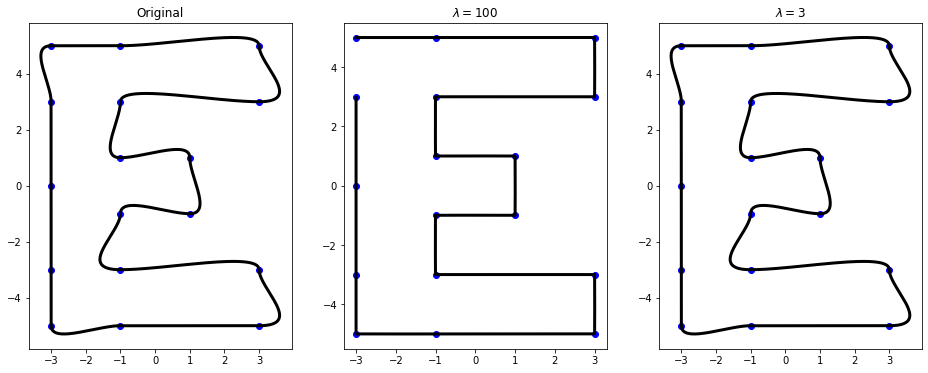

In [ ]:
t = np.arange(0, len(E), 0.01)
new_bez1 = np.array([compositeBézier(out, i) for i in t])
new_bez2 = np.array([compositeBézier(out2, i) for i in t])

a = np.array(Ep)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))
ax1.plot(E1_bezier[:, 0], E1_bezier[:, 1], color="black", linewidth=3)
ax1.set_title("Original")
ax1.scatter(a[:, 0], a[:, 1], color = "blue")

ax2.plot(new_bez1[:, 0], new_bez1[:, 1], color="black", linewidth=3)
ax2.scatter(a[:, 0], a[:, 1], color = "blue")
ax2.set_title(f"$\lambda = {lam1}$")

ax3.plot(new_bez2[:, 0], new_bez2[:, 1], color="black", linewidth=3)
ax3.scatter(a[:, 0], a[:, 1], color = "blue")
ax3.set_title(f"$\lambda = {lam2}$")
plt.show()


We see that when choosing  larger $\lambda$ our fitting term we get much closer to our data points, and the letter looks a lot cleaner. When we set $\lambda$ this large we also observe that the overall curve tends to being $C^{0}$ at the junction points and not 
$C^{1}$. One can also observe that the curve is not closed due to lack of periodicity. By conclusion, the gradient descent method is working by making the bezier curve straight just like our point_velocity() function in problem 3.3.